## Importação da Biblioteca

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", None)

# Importação dos Dados

In [3]:
# Ler Excel

data_frame= pd.read_excel(r'C:\Users\Daniela.Rodrigues\OneDrive - PSP INTERMEDIACAO DE SERVICOS LTDA\Área de Trabalho\New Case BA.xlsx')

In [4]:
# ver o tamanho do dataframe

data_frame.shape

(35787, 14)

# Visualização Inicial dos Dados

In [5]:
# Ver os 5 primeiros dados registrados

data_frame.head()

,email,user_id,event,lead_age,signup,signup _date,country,Office,intention,lifetime_comission_creator,lifetime_comission_affiliate,type_of_user,segmentation,Product Niche
0,2626920@hotemail.com,2626920.0,NaN,31.0,Y,2014-06-20,Brazil,Brazil,Producer,132036645.0,0.0,Producer,Star,Health and Sports
1,21882152@hotemail.com,21882152.0,a1,32.0,Y,2017-10-11,Brazil,Brazil,Producer,41352061.0,0.0,Producer,Star,Education
2,7932372@hotemail.com,7932372.0,a1,28.0,Y,2015-11-04,Brazil,Brazil,Producer,31278179.0,0.0,Producer,Star,Education
3,7076936@hotemail.com,7076936.0,a1,30.0,Y,2015-09-11,Brazil,Brazil,Producer,20078091.0,0.0,Producer,Star,Education
4,11628384@hotemail.com,11628384.0,c3,29.0,Y,2016-05-10,Brazil,Brazil,Producer,17329014.0,0.0,Producer,Star,Education


In [6]:
# Ver os 5 últimos dados registrados

data_frame.tail()

#podemos notar que existem valores negativos para a comissão e de acordo com a regra de negócio não deveria acontecer.

,email,user_id,event,lead_age,signup,signup _date,country,Office,intention,lifetime_comission_creator,lifetime_comission_affiliate,type_of_user,segmentation,Product Niche
35782,32576756@hotemail.com,32576756.0,a1,31.0,Y,2018-08-11,Brazil,Brazil,Affiliate,-772.000000,-772.000000,Hybrid,Seed,NaN
35783,20377432@hotemail.com,20377432.0,b2,27.0,Y,2017-08-06,Brazil,Brazil,Affiliate,-956.000000,-956.000000,Hybrid,Seed,NaN
35784,841924@hotemail.com,841924.0,a1,49.0,Y,2013-07-12,Brazil,Brazil,Affiliate,-1136.868377,-1136.868377,Hybrid,Seed,NaN
35785,30526776@hotemail.com,30526776.0,a1,44.0,Y,2018-06-21,Brazil,Brazil,Affiliate,-2273.736754,-2273.736754,Hybrid,Seed,NaN
35786,5391436@hotemail.com,5391436.0,b2,31.0,Y,2015-04-23,Brazil,Brazil,Affiliate,-93800.000000,-93800.000000,Hybrid,Seed,NaN


# Verificar a Integridade dos Dados

In [7]:
#Avaliar o tipo de dado em casa variável

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   email                         35787 non-null  object 
 1   user_id                       22677 non-null  float64
 2   event                         32551 non-null  object 
 3   lead_age                      32579 non-null  float64
 4   signup                        35787 non-null  object 
 5   signup _date                  22677 non-null  object 
 6   country                       32579 non-null  object 
 7   Office                        22677 non-null  object 
 8   intention                     32579 non-null  object 
 9   lifetime_comission_creator    22677 non-null  float64
 10  lifetime_comission_affiliate  22676 non-null  float64
 11  type_of_user                  21646 non-null  object 
 12  segmentation                  22677 non-null  object 
 13  P

In [8]:
# avaliar a quantidade de dados nulos por variável
data_frame.isnull().sum().sort_values(ascending=False).head(13)

Product Niche                   17533
type_of_user                    14141
lifetime_comission_affiliate    13111
user_id                         13110
signup _date                    13110
Office                          13110
lifetime_comission_creator      13110
segmentation                    13110
event                            3236
lead_age                         3208
country                          3208
intention                        3208
email                               0
dtype: int64

# Tratamento dos dados

In [9]:
#corrigir dados nulos da variável user_id  

data_frame['user_id'] = data_frame['email'].replace('@hotemail.com','', regex=True)

In [10]:
# avaliar a quantidade de dados nulos por variável
data_frame.isnull().sum().sort_values(ascending=False).head(13)

Product Niche                   17533
type_of_user                    14141
lifetime_comission_affiliate    13111
signup _date                    13110
Office                          13110
lifetime_comission_creator      13110
segmentation                    13110
event                            3236
lead_age                         3208
country                          3208
intention                        3208
email                               0
user_id                             0
dtype: int64

In [11]:
# ver a quantidade de cada valor da variável type_of_user 

data_frame['type_of_user'].value_counts(dropna=False)

Hybrid       15668
NaN          14141
Producer      4090
Affiliate     1888
Name: type_of_user, dtype: int64

In [12]:
# ver a porcentagem de cada valor da variável type_of_user

data_frame['type_of_user'].value_counts('mean', dropna=False)*100

Hybrid       43.781261
NaN          39.514349
Producer     11.428731
Affiliate     5.275659
Name: type_of_user, dtype: float64

In [13]:
# Avaliar se existe valor de comissão para os casos em que o type_of_user é nulo

data_frame.groupby(['signup','type_of_user']).agg({'lifetime_comission_creator':'sum','lifetime_comission_affiliate':'sum'})

## Temos valores de comissão apenas para usuários que possuem signup Y e type_of_user preenchido
## existem usuários Hybrids cadastrados incorretamente como Affiliate ou Producer


lifetime_comission_creator  lifetime_comission_affiliate
signup type_of_user                                                          
Y      Affiliate                   1.454058e+08                  1.094210e+09
       Hybrid                      3.094328e+09                  3.062748e+09
       Producer                    3.194034e+09                  2.767486e+08

In [14]:
# Excluir os valores nulos da variável type_of_user, pois o objetivo desta análise é avaliar a receita da Hotmart e dos criadores e afiliados

data_frame.dropna(subset=['type_of_user'], inplace=True)

In [15]:
## Avaliar quantidade de dados nulos após a exclusão 

data_frame.isnull().sum().sort_values(ascending=False)


Product Niche                   3392
event                             28
lifetime_comission_affiliate       1
email                              0
user_id                            0
lead_age                           0
signup                             0
signup _date                       0
country                            0
Office                             0
intention                          0
lifetime_comission_creator         0
type_of_user                       0
segmentation                       0
dtype: int64

In [16]:
 # Corrigir a classificação dos usuários hibridos.
    
    
data_frame.loc[(data_frame["lifetime_comission_affiliate"]>0) 
& (data_frame["lifetime_comission_creator"]>0),'type_of_user']= 'Hybrid' 

In [17]:
## Verificar se existem valores negativos para a comissão de Criadores

data_frame.sort_values('lifetime_comission_creator', axis = 0, ascending = True,
                 inplace = True, na_position ='last')
data_frame['lifetime_comission_creator'] 


35786   -9.380000e+04
35785   -2.273737e+03
19547   -1.935000e+03
35784   -1.136868e+03
35783   -9.560000e+02
35782   -7.720000e+02
35781   -7.190000e+02
35780   -6.180000e+02
35779   -6.000000e+02
35778   -6.000000e+02
35777   -5.940000e+02
35772   -5.540000e+02
35776   -5.100000e+02
35775   -5.070000e+02
35774   -4.950000e+02
35773   -4.260000e+02
35771   -3.990000e+02
35770   -3.960000e+02
35769   -3.940000e+02
35768   -3.680000e+02
35767   -3.500000e+02
35766   -3.220000e+02
35765   -3.080000e+02
35764   -2.900000e+02
35763   -2.580000e+02
35762   -2.470000e+02
35761   -2.290000e+02
35760   -2.130000e+02
35759   -1.890000e+02
35758   -1.780000e+02
35757   -1.760000e+02
35756   -1.700000e+02
35755   -1.700000e+02
35754   -1.420000e+02
35749   -1.360000e+02
35748   -1.350000e+02
35753   -1.270000e+02
19290   -1.050000e+02
35752   -1.000000e+02
35751   -9.700000e+01
35750   -7.500000e+01
35747   -5.300000e+01
35746   -5.300000e+01
35745   -5.300000e+01
35744   -4.900000e+01
35743   -3

In [18]:
# excluir valores negativos de comissão para os Afiliados
data_frame.loc[data_frame["lifetime_comission_affiliate"]<0,'lifetime_comission_affiliate'] = 0 

In [19]:
# Excluir valores negativos de comissão para os Criadores
data_frame.loc[data_frame["lifetime_comission_creator"]<0,'lifetime_comission_creator'] = 0 

In [20]:
##validar se a classificação do tipo de usuário está correta
data_frame.groupby(['type_of_user']).agg({'lifetime_comission_creator':'sum','lifetime_comission_affiliate':'sum'})

,lifetime_comission_creator,lifetime_comission_affiliate
type_of_user,,
Affiliate,0.000000e+00,2.170609e+08
Hybrid,5.532732e+09,4.216755e+09
Producer,9.011479e+08,0.000000e+00


In [21]:
#subtituir dado nulo na varivável lifetime_comission_affiliate 

data_frame["lifetime_comission_affiliate"].fillna(0, inplace=True)

In [22]:
# O valores nulos foram retirados
data_frame.isnull().sum().sort_values(ascending=False).head(13)

Product Niche                   3392
event                             28
email                              0
user_id                            0
lead_age                           0
signup                             0
signup _date                       0
country                            0
Office                             0
intention                          0
lifetime_comission_creator         0
lifetime_comission_affiliate       0
type_of_user                       0
dtype: int64

In [23]:
 #Filtro para excluir usuários sem comissão
data_frame.loc[(data_frame["lifetime_comission_affiliate"]=="0") 
& (data_frame["lifetime_comission_creator"]=="0"),'type_of_user']= 'excluir' 

# Excluir ususários sem comissão
data_frame.drop(data_frame[data_frame['type_of_user'] == 'excluir' ].index, inplace=True)

In [25]:
#gerar base tratada para trabalhar no sql
data_frame.to_excel(r'C:\Users\daniela.rodrigues\Downloads\New_Case_tratada.xlsx',
             sheet_name='tratada')  

## Outliers 

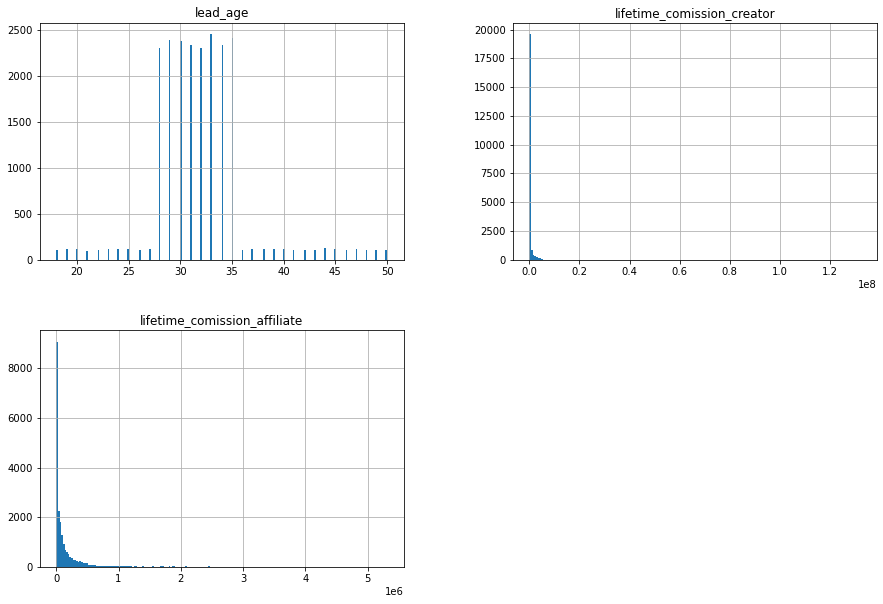

In [26]:
# plotar histograma

data_frame.hist(bins=200, figsize=(15,10));

In [27]:
# avaliar as estatísticas de cada variável
data_frame.describe()

,lead_age,lifetime_comission_creator,lifetime_comission_affiliate
count,21646.000000,2.164600e+04,2.164600e+04
mean,31.924189,2.972318e+05,2.048330e+05
std,4.491992,1.186264e+06,4.982336e+05
min,18.000000,0.000000e+00,0.000000e+00
25%,29.000000,1.044100e+04,6.828000e+03
50%,32.000000,6.623350e+04,4.636750e+04
75%,34.000000,2.224139e+05,1.684542e+05
max,50.000000,1.320366e+08,5.312110e+06


In [28]:
# Verificar o limite inferior e superior Criadores

q1_linha = data_frame.lifetime_comission_creator.quantile(.25)
q3_linha = data_frame.lifetime_comission_creator.quantile(.75)
Iqr_linha = q3_linha - q1_linha
sup_linha = q3_linha + 1.5*Iqr_linha
inf_linha = q1_linha - 1.5*Iqr_linha

print("Iqr da variável lifetime_comission_creator: ", Iqr_linha)
print("Limite Superior de atributo: ", sup_linha)
print("Limite Inferior de atributo: ", inf_linha)

Iqr da variável lifetime_comission_creator:  211972.939999999
Limite Superior de atributo:  540373.3499999975
Limite Inferior de atributo:  -307518.4099999985


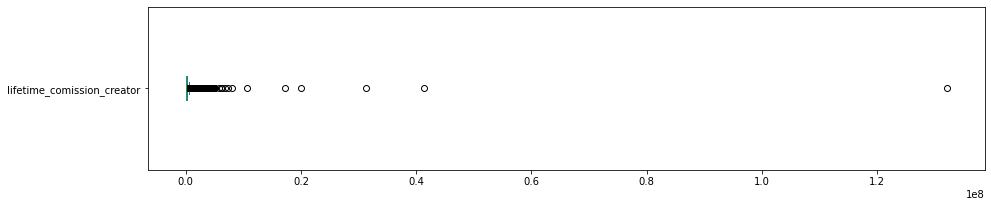

lifetime_comission_creator: valores acima de 540373.34:
Entradas: 2420
Porcentagem: 11.1799%


In [29]:
# boxplot creator

data_frame.lifetime_comission_creator.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores limite superior 
print("lifetime_comission_creator: valores acima de 540373.34:")
print("Entradas: {}".format(len(data_frame[data_frame.lifetime_comission_creator>540373.3499999975])))
print("Porcentagem: {:.4f}%".format((len(data_frame[data_frame.lifetime_comission_creator>540373.3499999975]) / data_frame.shape[0])*100))


In [31]:
# Ver quantidade de valores limite infeior
print("lifetime_comission_creator: valores acima de 307518.40:")
print("Entradas: {}".format(len(data_frame[data_frame.lifetime_comission_creator<307518.4099999985])))
print("Porcentagem: {:.4f}%".format((len(data_frame[data_frame.lifetime_comission_creator<307518.4099999985]) / data_frame.shape[0])*100))


lifetime_comission_creator: valores acima de 307518.40:
Entradas: 17458
Porcentagem: 80.6523%


In [33]:
# Verificar o limite inferior e superior Afiliados

q1_linha = data_frame.lifetime_comission_affiliate.quantile(.25)
q3_linha = data_frame.lifetime_comission_affiliate.quantile(.75)
Iqr_linha = q3_linha - q1_linha
sup_linha = q3_linha + 1.5*Iqr_linha
inf_linha = q1_linha - 1.5*Iqr_linha

print("Iqr da variável lifetime_comission_affiliate: ", Iqr_linha)
print("Limite Superior de atributo: ", sup_linha)
print("Limite Inferior de atributo: ", inf_linha)

Iqr da variável lifetime_comission_affiliate:  161626.25
Limite Superior de atributo:  410893.625
Limite Inferior de atributo:  -235611.375


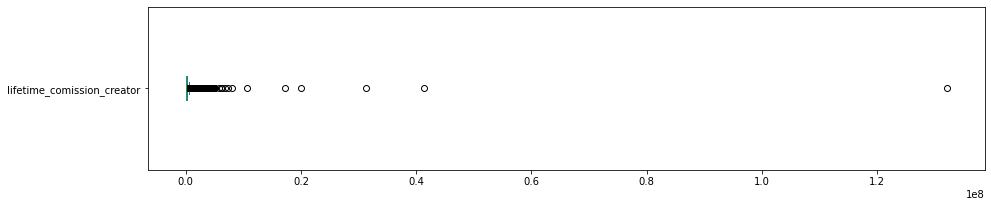

lifetime_comission_affiliate: valores acima de 410893.62:
Entradas: 2406
Porcentagem: 19.2691%


In [34]:
# boxplot Afiliados

data_frame.lifetime_comission_creator.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores limite superior 
print("lifetime_comission_affiliate: valores acima de 410893.62:")
print("Entradas: {}".format(len(data_frame[data_frame.lifetime_comission_affiliate>410893.625])))
print("Porcentagem: {:.4f}%".format((len(data_frame[data_frame.lifetime_comission_affiliate>235611.375]) / data_frame.shape[0])*100))


In [35]:
# Ver quantidade de valores limite infeior
print("lifetime_comission_affiliate: valores acima de 235611.37:")
print("Entradas: {}".format(len(data_frame[data_frame.lifetime_comission_affiliate<235611.375])))
print("Porcentagem: {:.4f}%".format((len(data_frame[data_frame.lifetime_comission_affiliate<235611.375]) / data_frame.shape[0])*100))


lifetime_comission_affiliate: valores acima de 235611.37:
Entradas: 17475
Porcentagem: 80.7309%
